In [ ]:
import pandas as pd
for i in range(1, 13):
    filename = f'sales2019_{i}.csv' 
    # Đọc tệp CSV
    df = pd.read_csv(filename)
    # Loại bỏ các hàng sai 
    df = df[df['Order ID'] != 'Order ID']

    # Loại bỏ giá trị null
    df = df.dropna()

    # Đổi định dạng cột "Order Date" về dd/mm/yyyy
    df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M').dt.strftime('%d/%m/%Y')

    # Thêm cột "City" từ cột "Purchase Address"
    def extract_city(address):
        parts = address.split(',')
        if len(parts) > 1:
            return parts[1].strip()
        else:
            return ''
    df['City'] = df['Purchase Address'].apply(extract_city)
    df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
    df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')

    # Thêm cột tích của Quantity_Ordered và Price_Each
    df['Total Price'] = df['Quantity Ordered'] * df['Price Each']
    # Lưu file
    output_filename = f'sale2019_{i}.csv'
    df.to_csv(output_filename, index=False)
    
    print(f"Processed file saved as: {output_filename}")

print("All files processed successfully!")

In [ ]:
import pandas as pd
import glob

# Đọc từng file CSV vào DataFrame và lưu vào một list
dfs = []
for i in range(1, 13):
    filename = f'sale2019_{i}.csv'
    print(f"Processing file: {filename}")
    df = pd.read_csv(filename)
    dfs.append(df)
    

# Gộp các DataFrame từ list lại với nhau
df_combined = pd.concat(dfs, ignore_index=True)

# Lưu kết quả vào một tệp CSV mới
df_combined.to_csv('SalesAll2019.csv', index=False)




Processing file: sale2019_1.csv
Processing file: sale2019_2.csv
Processing file: sale2019_3.csv
Processing file: sale2019_4.csv
Processing file: sale2019_5.csv
Processing file: sale2019_6.csv
Processing file: sale2019_7.csv
Processing file: sale2019_8.csv
Processing file: sale2019_9.csv
Processing file: sale2019_10.csv
Processing file: sale2019_11.csv
Processing file: sale2019_12.csv


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('SalesAll2019.csv')
def normalize_product_name(product_name):
    # Chuyển đổi tất cả thành chữ thường
    product_name = product_name.lower()
    # Xử lý khoảng trắng
    product_name = product_name.strip()
    # Các xử lý chuẩn hóa khác nếu cần
    
    return product_name
# Áp dụng hàm chuẩn hóa lên cột 'Product'
df['Product'] = df['Product'].apply(normalize_product_name)
def split_address(address):
    parts = address.split(', ')
    if len(parts) >= 2:
        city_zip = parts[-2].split(' ')
        city = parts[1]
        zipcode = parts[2]
        street = parts[0]
        return street, zipcode
    else:
        return None, None
df['Purchase Address'],df['Zip']=zip(*df['Purchase Address'].apply(split_address))



In [46]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Total Price,Zip
0,141234,iphone,1,700.00,22/01/2019,944 Walnut St,Boston,700.00,MA 02215
1,141235,lightning charging cable,1,14.95,28/01/2019,185 Maple St,Portland,14.95,OR 97035
2,141236,wired headphones,2,11.99,17/01/2019,538 Adams St,San Francisco,23.98,CA 94016
3,141237,27in fhd monitor,1,149.99,05/01/2019,738 10th St,Los Angeles,149.99,CA 90001
4,141238,wired headphones,1,11.99,25/01/2019,387 10th St,Austin,11.99,TX 73301


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   City              185950 non-null  object 
 7   Total Price       185950 non-null  float64
 8   Zip               185950 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 12.8+ MB


In [48]:
print(df.describe())

            Order ID  Quantity Ordered     Price Each    Total Price
count  185950.000000     185950.000000  185950.000000  185950.000000
mean   230417.569379          1.124383     184.399735     185.490917
std     51512.737110          0.442793     332.731330     332.919771
min    141234.000000          1.000000       2.990000       2.990000
25%    185831.250000          1.000000      11.950000      11.950000
50%    230367.500000          1.000000      14.950000      14.950000
75%    275035.750000          1.000000     150.000000     150.000000
max    319670.000000          9.000000    1700.000000    3400.000000


Product
usb-c charging cable          21903
lightning charging cable      21658
aaa batteries (4-pack)        20641
aa batteries (4-pack)         20577
wired headphones              18882
apple airpods headphones      15549
bose soundsport headphones    13325
27in fhd monitor               7507
iphone                         6842
27in 4k gaming monitor         6230
34in ultrawide monitor         6181
google phone                   5525
flatscreen tv                  4800
macbook pro laptop             4724
thinkpad laptop                4128
20in monitor                   4101
vareebadd phone                2065
lg washing machine              666
lg dryer                        646
Name: count, dtype: int64


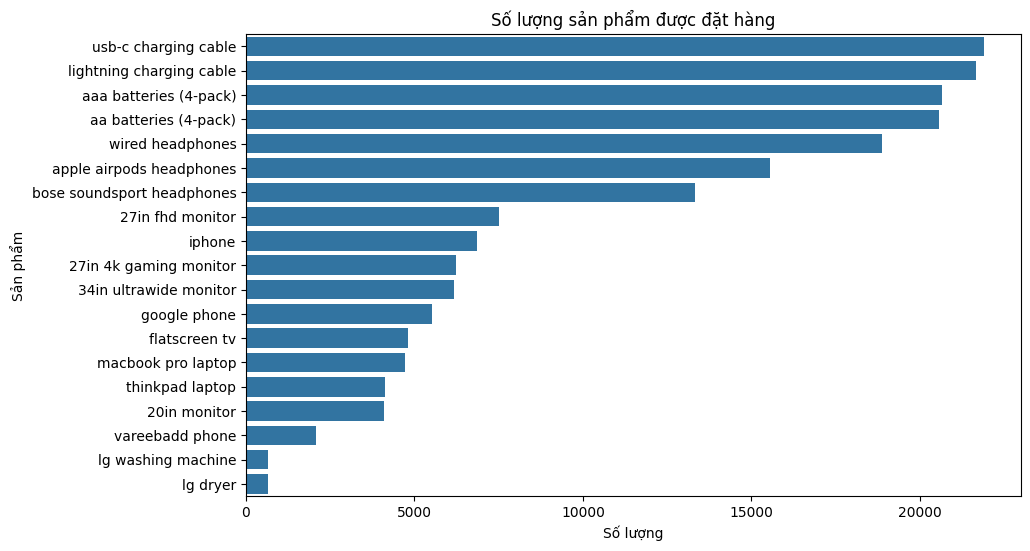

In [49]:
# Đếm số lượng sản phẩm khác nhau
product_counts = df['Product'].value_counts()
print(product_counts)

# Biểu đồ hóa
plt.figure(figsize=(10, 6))
sns.countplot(y='Product', data=df, order=product_counts.index)
plt.title('Số lượng sản phẩm được đặt hàng')
plt.xlabel('Số lượng')
plt.ylabel('Sản phẩm')
plt.show()

-4 sản phẩm được mua nhiều nhất USB-C Charging Cable;Lightning Charging Cable;AAA Batteries (4-pack);AA Batteries (4-pack)
vì giá thành rẻ và có nhu cầu sử dụng rất nhiều

C:\Users\Admin\AppData\Local\Temp\ipykernel_24852\4246221487.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Order Month', data=df, palette='viridis')


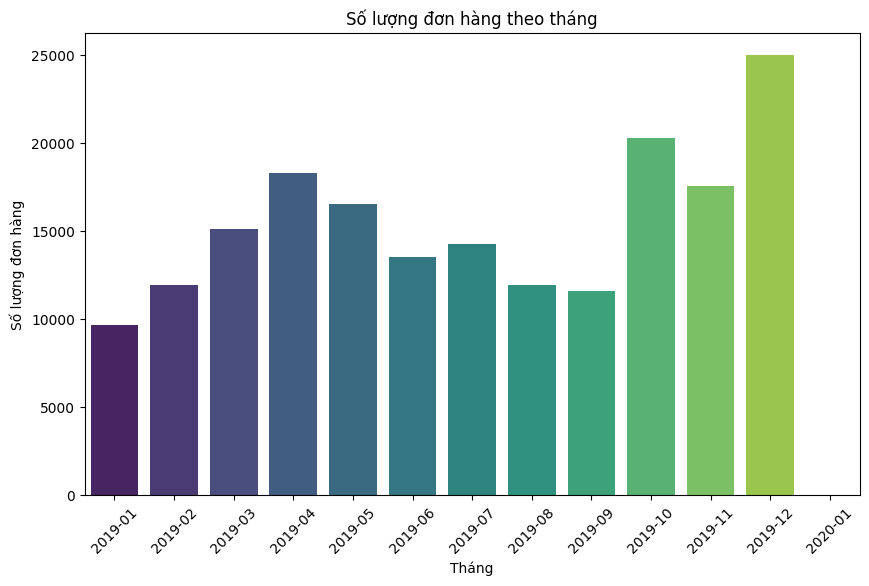

In [50]:
# Chuyển đổi Order Date sang định dạng datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

# Biểu đồ hóa số lượng đơn hàng theo tháng
df['Order Month'] = df['Order Date'].dt.to_period('M')
plt.figure(figsize=(10, 6))
sns.countplot(x='Order Month', data=df, palette='viridis')
plt.title('Số lượng đơn hàng theo tháng')
plt.xticks(rotation=45)
plt.xlabel('Tháng')
plt.ylabel('Số lượng đơn hàng')
plt.show()


-tháng 12 có lượng đơn hàng lớn nhất trong năm vì nhu cầu mua sắm của mọi người nhiều để chuẩn chuẩn bị cho giáng sinh và cuối năm

C:\Users\Admin\AppData\Local\Temp\ipykernel_24852\4205732699.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Product', data=df_december, palette='viridis')


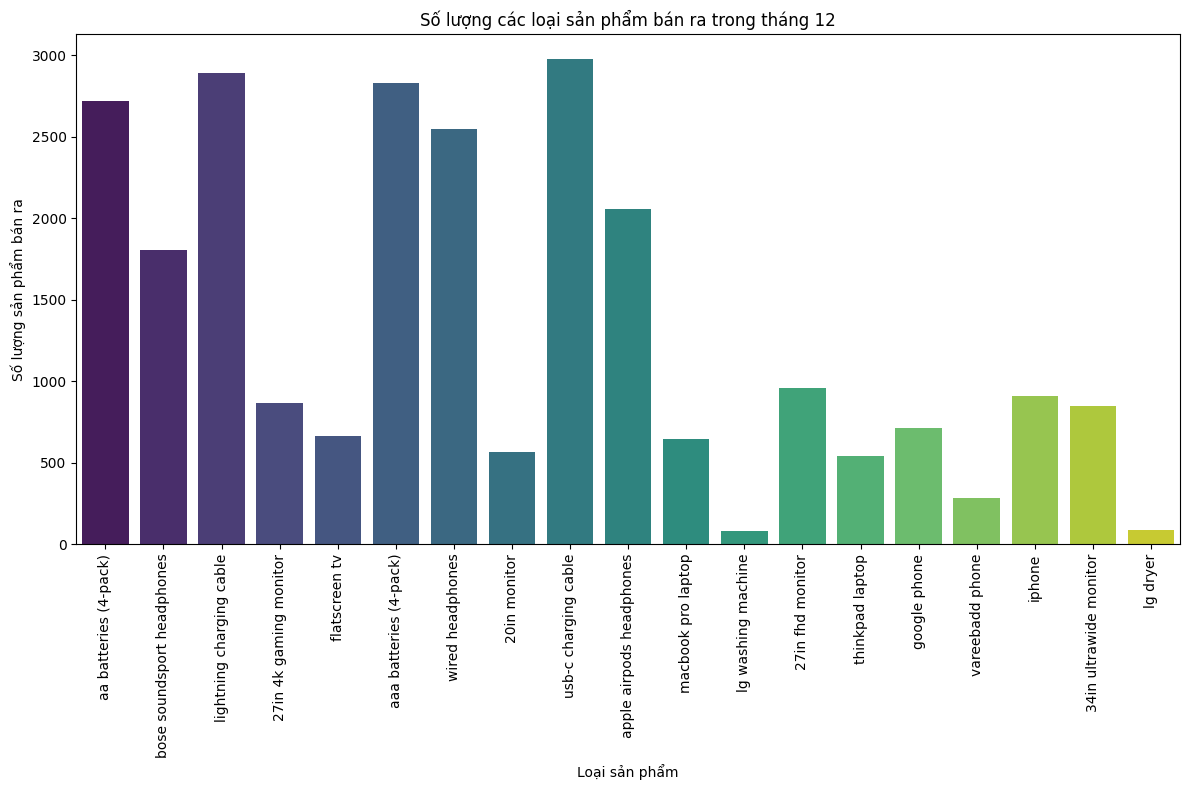

In [54]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

# Tạo cột 'Order Month' để lưu tháng của mỗi đơn hàng
df['Order Month'] = df['Order Date'].dt.to_period('M')

# Lọc ra các đơn hàng trong tháng 12
df_december = df[df['Order Month'].dt.month == 12]

# Biểu đồ hóa số lượng các loại sản phẩm bán ra trong tháng 12
plt.figure(figsize=(12, 8))
sns.countplot(x='Product', data=df_december, palette='viridis')
plt.title('Số lượng các loại sản phẩm bán ra trong tháng 12')
plt.xticks(rotation=90)
plt.xlabel('Loại sản phẩm')
plt.ylabel('Số lượng sản phẩm bán ra')
plt.tight_layout()
plt.show()

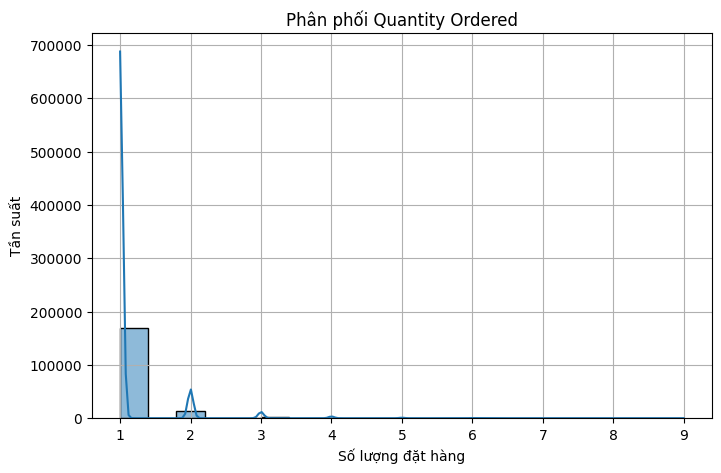

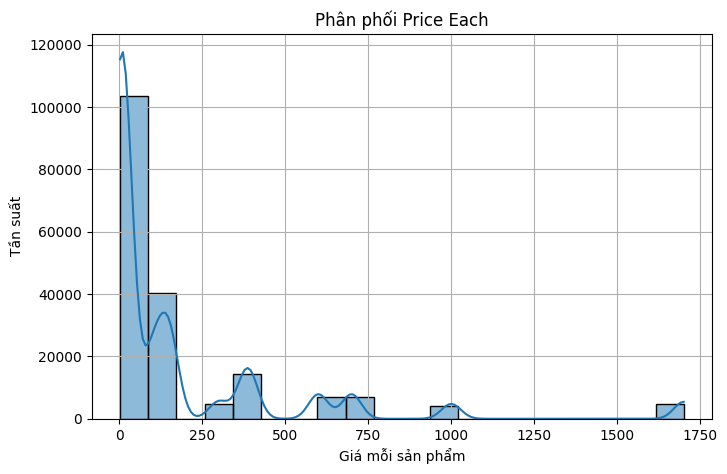

In [ ]:
# Biểu đồ phân phối Quantity Ordered
plt.figure(figsize=(8, 5))
sns.histplot(df['Quantity Ordered'], bins=20, kde=True, stat='count')
plt.title('Phân phối Quantity Ordered')
plt.xlabel('Số lượng đặt hàng')
plt.ylabel('Tần suất')
plt.grid(True)
plt.show()

# Biểu đồ phân phối Price Each
plt.figure(figsize=(8, 5))
sns.histplot(df['Price Each'], bins=20, kde=True, stat='count')
plt.title('Phân phối Price Each')
plt.xlabel('Giá mỗi sản phẩm')
plt.ylabel('Tần suất')
plt.grid(True)
plt.show()

City
San Francisco    44732
Los Angeles      29605
New York City    24876
Boston           19934
Atlanta          14881
Dallas           14820
Seattle          14732
Portland         12465
Austin            9905
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_24852\610390453.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=address_counts.index, y=address_counts.values, palette='viridis')


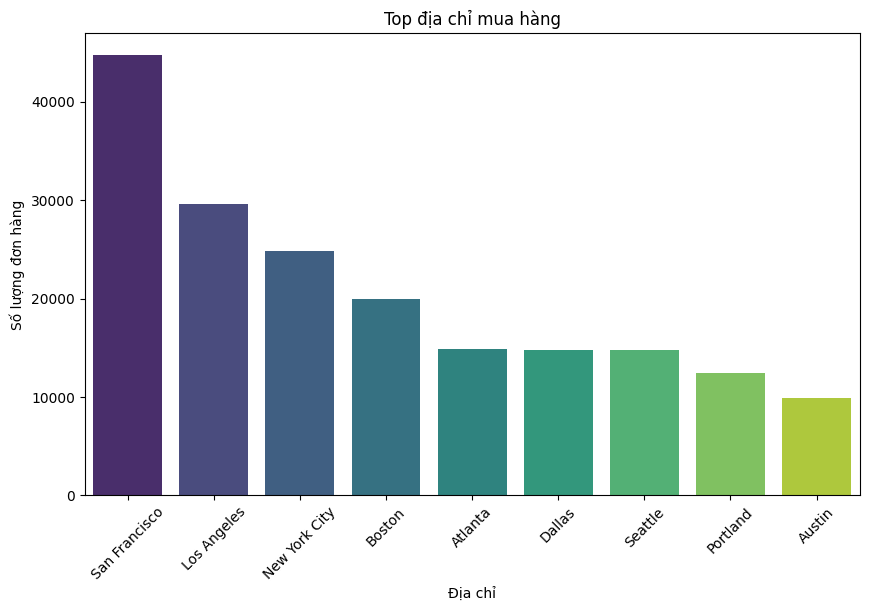

In [ ]:
# Đếm số lượng đơn hàng theo địa chỉ mua hàng
address_counts = df['City'].value_counts().head(10)
print(address_counts)

# Biểu đồ hóa
plt.figure(figsize=(10, 6))
sns.barplot(x=address_counts.index, y=address_counts.values, palette='viridis')
plt.title('Top địa chỉ mua hàng')
plt.xlabel('Địa chỉ')
plt.ylabel('Số lượng đơn hàng')
plt.xticks(rotation=45)
plt.show()


-San Francisco là thành phố có lượng đơn đặt hàng lớn nhất là 44732

C:\Users\Admin\AppData\Local\Temp\ipykernel_24852\1002269312.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Product', data=df_san_francisco, palette='viridis')


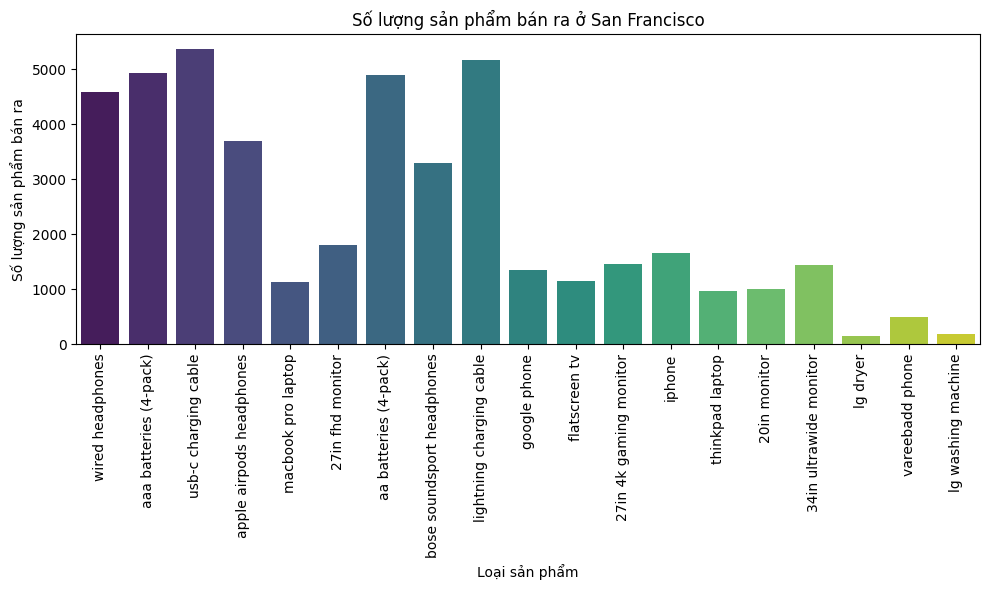

In [56]:
# Lọc ra các đơn hàng ở thành phố San Francisco
df_san_francisco = df[df['City'] == 'San Francisco']

# Biểu đồ hóa số lượng sản phẩm bán ra ở San Francisco
plt.figure(figsize=(10, 6))
sns.countplot(x='Product', data=df_san_francisco, palette='viridis')
plt.title('Số lượng sản phẩm bán ra ở San Francisco')
plt.xticks(rotation=90)
plt.xlabel('Loại sản phẩm')
plt.ylabel('Số lượng sản phẩm bán ra')
plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_24852\4027020460.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Order Day', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='pastel')


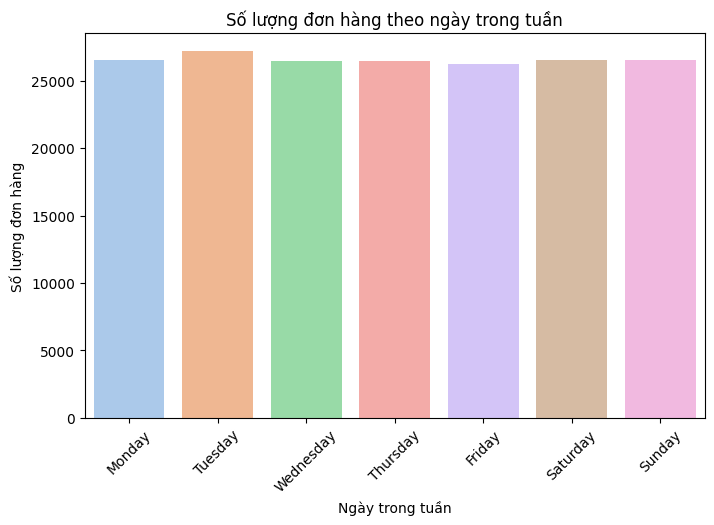

In [ ]:
# Biểu đồ số lượng đơn hàng theo ngày trong tuần
df['Order Day'] = df['Order Date'].dt.day_name()
plt.figure(figsize=(8, 5))
sns.countplot(x='Order Day', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='pastel')
plt.title('Số lượng đơn hàng theo ngày trong tuần')
plt.xlabel('Ngày trong tuần')
plt.ylabel('Số lượng đơn hàng')
plt.xticks(rotation=45)
plt.show()
